Задание 1. Работа с реальными данными (20 баллов)

In [174]:
path_bed  = './alignment.bed'
path_gff = './rrna_annotation.gff'

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [176]:
colnames_gff = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
colnames_bed = ["chrom", "chromStart", "chromEnd", "name", "score", "strand"]

In [177]:
alignment_bed = pd.read_csv(path_bed, sep = "\t", names = colnames_bed)

In [178]:
alignment_bed.head()

,chrom,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [179]:
gff = pd.read_csv(path_gff, sep = "\t", skiprows=1, names = colnames_gff)

In [180]:
def search_RNA(string):
    res = re.findall('\d{1,2}S', string)
    return res[0]


In [181]:
gff.attributes = gff.attributes.map(lambda p: search_RNA(p))

In [182]:
gff.groupby(["seqid"]).attributes.apply(lambda x: x)

0      16S
1      23S
2      16S
3      23S
4      23S
      ... 
343    23S
344     5S
345     5S
346    23S
347    16S
Name: attributes, Length: 348, dtype: object

In [183]:
gff

,seqid,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [184]:
gff.shape

(348, 9)

In [185]:
gff["counter"] = pd.Series([0] * 348)

In [186]:
gff

,seqid,source,type,start,end,score,strand,phase,attributes,counter
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S,0
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S,0
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S,0
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S,0
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S,0
...,...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S,0
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,0
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S,0
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S,0


In [187]:
count_rna = gff.groupby(["seqid", "attributes"]).counter.apply(lambda x: x.count())   # немного некрасиво работает метод, но инфу получил

In [188]:
type(count_rna.index)   # мультииндекс
count_rna = count_rna.to_dict()

In [189]:
check = {"16S": "5S", "23S": "16S", "5S":"23S"}
all_rna = []
ref = []
value = []
for key in count_rna:
    all_rna.append(key[1])
    ref.append(key[0])
    value.append(count_rna[key])



In [190]:
rna = ["5S", "16S", "23S"]
all_comb = []
for i in ref:
    for k in rna:
        all_comb.append((i, k))



In [191]:
rest = set(all_comb) - set(count_rna.keys())

In [192]:
rest = list(rest)

In [193]:
rest

[('Reference_10', '5S'), ('Reference_8', '5S')]

In [194]:
count_rna[rest[0]] = 0
count_rna[rest[1]] = 0

In [197]:
ref = []
for key in count_rna:
    ref.append(key[0])


In [198]:
new_ref = {}
for i in set(ref):
    new_ref[i] = {}
    for key in count_rna:
        if key[0] == i:
            new_ref[i][key[1]] = count_rna[key]


In [199]:
new_ref

{'Reference_18': {'16S': 2, '23S': 3, '5S': 2},
 'Reference_12': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_21': {'16S': 1, '23S': 1, '5S': 1},
 'Reference_7': {'16S': 9, '23S': 8, '5S': 8},
 'Reference_23': {'16S': 1, '23S': 1, '5S': 1},
 'Reference_8': {'16S': 2, '23S': 2, '5S': 0},
 'Reference_22': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_1': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_13': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_16': {'16S': 7, '23S': 7, '5S': 8},
 'Reference_20': {'16S': 11, '23S': 10, '5S': 10},
 'Reference_26': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_15': {'16S': 8, '23S': 8, '5S': 8},
 'Reference_5': {'16S': 6, '23S': 6, '5S': 6},
 'Reference_17': {'16S': 7, '23S': 7, '5S': 8},
 'Reference_25': {'16S': 3, '23S': 3, '5S': 3},
 'Reference_2': {'16S': 5, '23S': 5, '5S': 5},
 'Reference_6': {'16S': 2, '23S': 2, '5S': 2},
 'Reference_9': {'16S': 6, '23S': 6, '5S': 6},
 'Reference_24': {'16S': 4, '23S': 4, '5S': 4},
 'Reference_14': {'16S': 4, '23S': 4, '5S': 

In [200]:
rna_5S = []
rna_23S = []
rna_16S = []
for key in new_ref:
    rna_5S.append(new_ref[key]['5S'])
    rna_23S.append(new_ref[key]['23S'])
    rna_16S.append(new_ref[key]['16S'])


In [170]:
len(rna_23S) == len(rna_23S) == len(rna_16S)

True

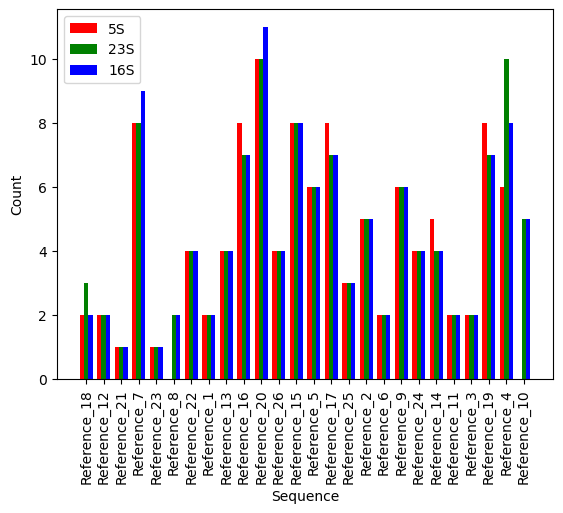

In [201]:

N = len(rna_23S)
ind = np.arange(N)
width = 0.25

xvals = rna_5S
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = rna_23S
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = rna_16S
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Sequence")
plt.ylabel('Count')

plt.xticks(ind+width, list(new_ref.keys()), rotation='vertical')
plt.legend( (bar1, bar2, bar3), ('5S', '23S', '16S') )
plt.show()




In [202]:
gff.drop("counter", axis=1, inplace=True)

In [203]:
any(gff.duplicated())   # нет дубликатов

False

In [204]:
alignment_bed = alignment_bed.rename(columns = {"chrom": "seqid"})

In [205]:
alignment_bed

,seqid,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [206]:
df = pd.merge(gff, alignment_bed, on='seqid')   # объединяем по совпадениям референсных геномов, иначе точно не совпадают, далее будем считать границу

In [207]:
idx = np.where((df.chromEnd >= df.end) & (df.chromStart <= df.start)) #считаю границу, берем индексы прошедших условие
idx = idx[0].tolist()
df = df.iloc[idx]

In [208]:
df = df.drop(df.columns[[-1, -2]], axis = 1)

In [235]:
df.head()   #итогове пересечение контигов на сборку

,seqid,source,type,start,end,score_x,strand_x,phase,attributes,chromStart,chromEnd,name
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323


Pie chart (Доп)

In [210]:
data_pie = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [211]:
idx = np.where(data_pie["Published Airline"].value_counts() >= 100)[0].tolist()

In [212]:
slice = data_pie["Published Airline"].iloc[idx].value_counts()
labels = data_pie["Published Airline"].iloc[idx].value_counts().index

In [213]:
explode = [0] * len(labels)
explode[0] = 0.1

In [214]:
explode

[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [215]:
data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()

[560, 300, 109]

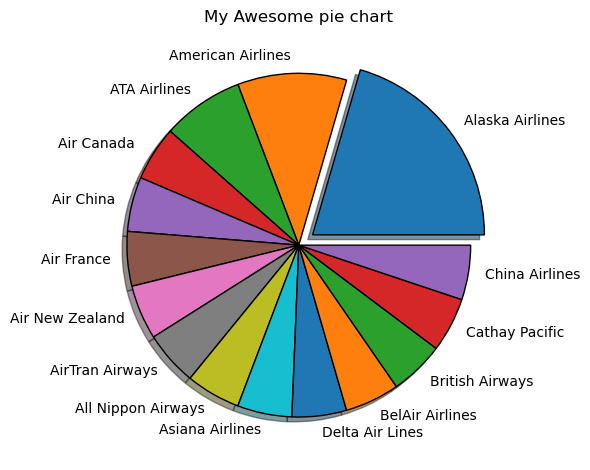

In [218]:
plt.pie(slice, labels = labels, explode = explode, wedgeprops= {"edgecolor": "black"}, shadow = True)
plt.title("My Awesome pie chart")
plt.tight_layout()
plt.show()



In [221]:
geo = data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()

In [225]:
data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts()

US        560
Mexico    300
Canada    109
Name: GEO Region, dtype: int64

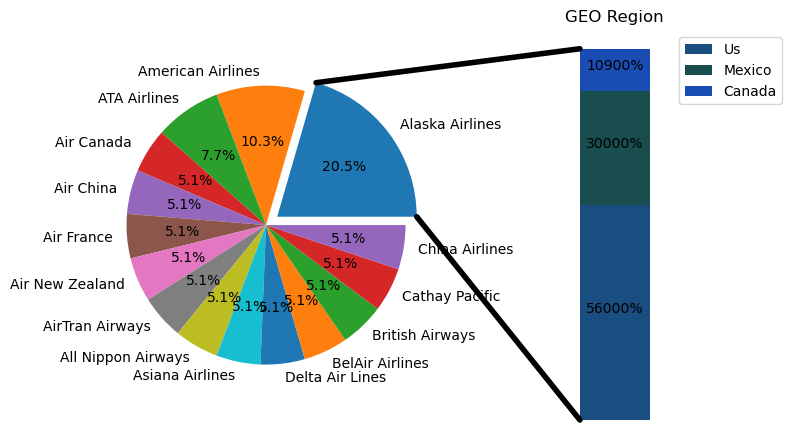

In [234]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
slice = data_pie["Published Airline"].iloc[idx].value_counts()
labels = data_pie["Published Airline"].iloc[idx].value_counts().index
explode = [0] * len(labels)
explode[0] = 0.1
# rotate so that first wedge is split by the x-axis
angle = -180 * slice[0]
ax1.pie(slice, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
geo = data_pie[data_pie["Published Airline"] == "Alaska Airlines"]["GEO Region"].value_counts().tolist()
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]

for j in range(len(geo)):
    height = geo[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('GEO Region')
ax2.legend(('Us', 'Mexico', 'Canada'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)


x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show();


|Eda

In [3]:
covid = pd.read_csv("./owid-covid-data.csv")

In [4]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
import numpy as np

In [6]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [13]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [22]:
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,iso_code,0.000000
1,continent,5.751487
2,location,0.000000
3,date,0.000000
4,total_cases,4.069110
...,...,...
62,human_development_index,20.079149
63,excess_mortality_cumulative_absolute,96.614369
64,excess_mortality_cumulative,96.614369
65,excess_mortality,96.593039


In [7]:
#посмотрим total deaths по странам

In [45]:
labels = covid.groupby(["continent"]).total_deaths.agg(["count"]).index
slice = covid.groupby(["continent"]).total_deaths.agg(["count"])["count"].tolist()

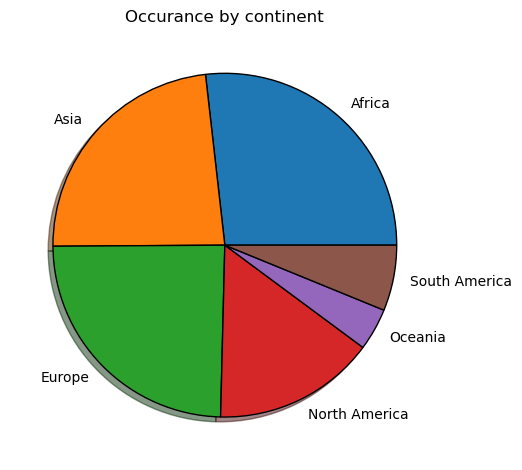

In [48]:
plt.pie(slice, labels = labels, wedgeprops= {"edgecolor": "black"}, shadow = True)
plt.title("Occurance by continent")
plt.tight_layout()
plt.show()

In [66]:
#далее посмотрим на распределение смертей по самым большим сегментам - Европы и Африки

In [56]:
Europe = covid.query("continent == 'Europe'")
labels = Europe.groupby(["location"]).total_deaths.agg(["count"]).index
counter = Europe.groupby(["location"]).total_deaths.agg(["count"])["count"].tolist()

<BarContainer object of 51 artists>

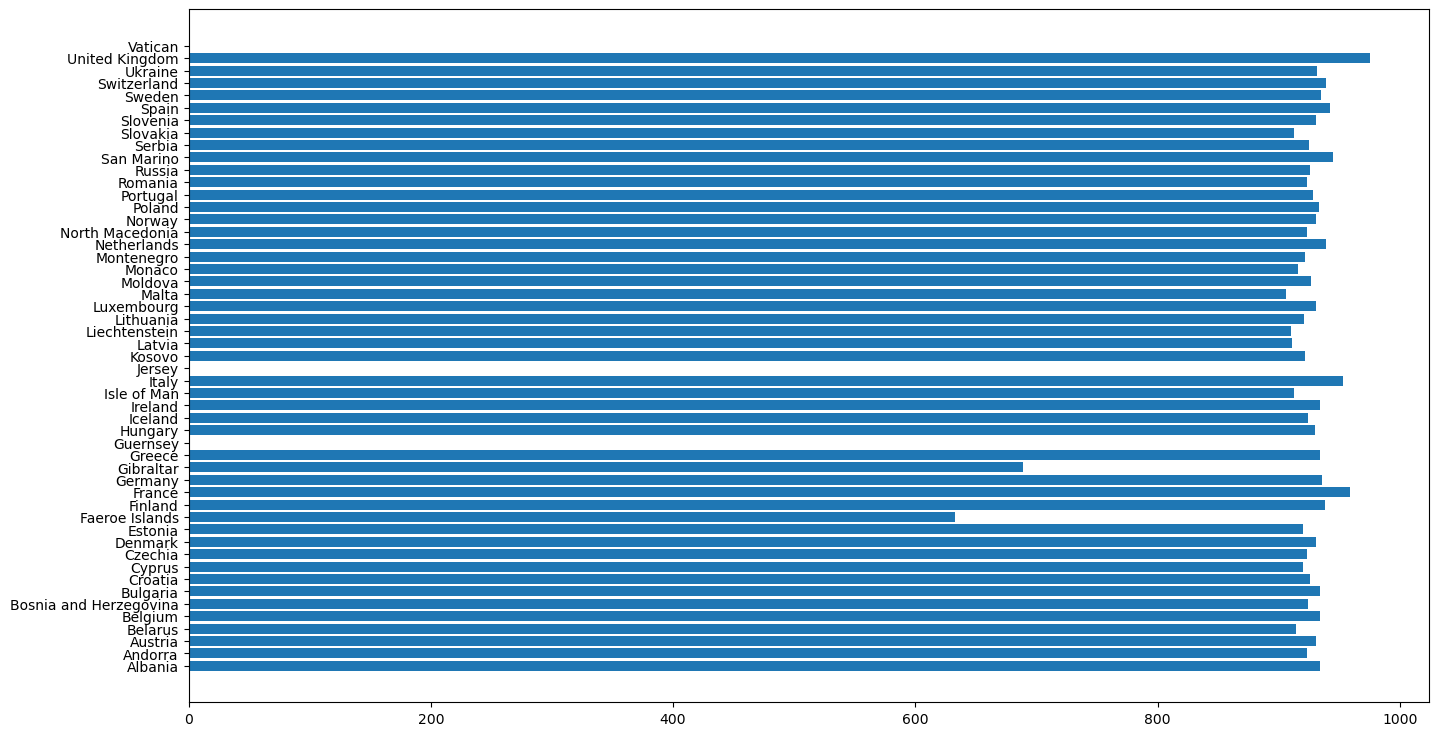

In [64]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(labels, counter);

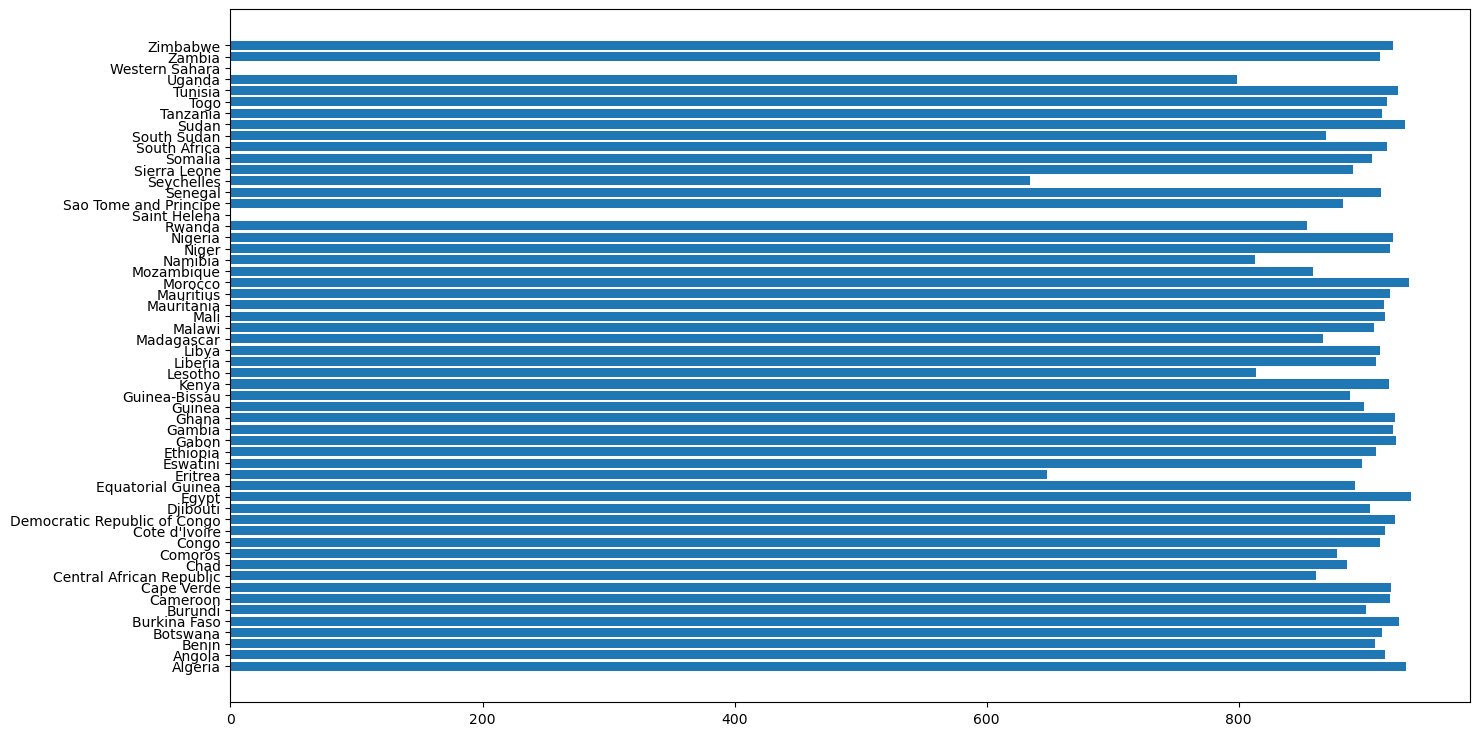

In [65]:
Africa = covid.query("continent == 'Africa'")
labels = Africa.groupby(["location"]).total_deaths.agg(["count"]).index
counter = Africa.groupby(["location"]).total_deaths.agg(["count"])["count"].tolist()
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(labels, counter);

Распределение больше похоже к равномерному

In [69]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [70]:
import plotly.graph_objects as go

In [72]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [79]:
# посмотрим как коррелируют общее число вакцинировавших и число новых случаев заболевания

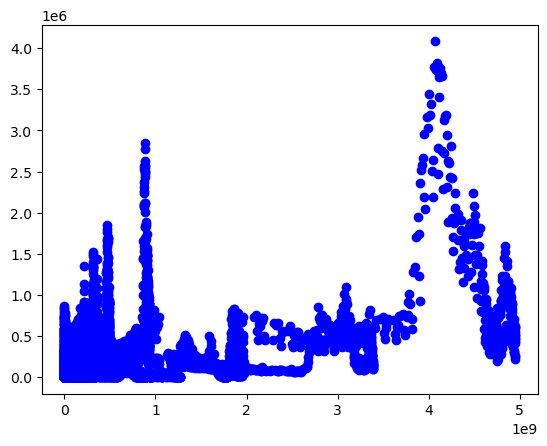

In [110]:
vacc = covid.people_fully_vaccinated[covid.people_fully_vaccinated.notna() == True].sort_values()
new_case = covid.new_cases.iloc[vacc.index]
plt.scatter(vacc, new_case, c ="blue")
plt.show()

In [111]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

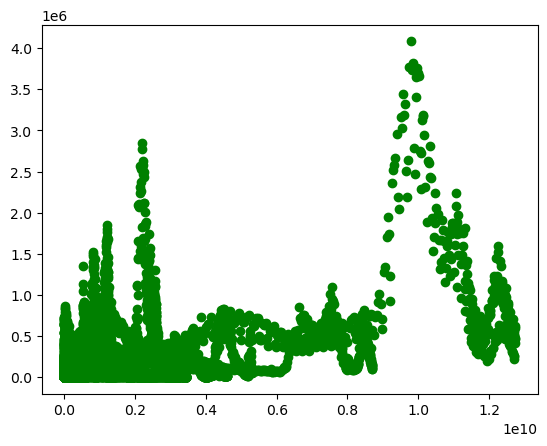

In [113]:
vacc = covid.total_vaccinations[covid.total_vaccinations.notna() == True].sort_values()
new_case = covid.new_cases.iloc[vacc.index]
plt.scatter(vacc, new_case, c ="green")
plt.show()

In [109]:
# ожидали увидеть антикорреляцию, но не всех точках данные коррелируют

Выделим топ 10 стран по кол-ву смертей

In [151]:
covid.location

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
220338       Zimbabwe
220339       Zimbabwe
220340       Zimbabwe
220341       Zimbabwe
220342       Zimbabwe
Name: location, Length: 220343, dtype: object

In [122]:
deaths_per_country = covid.groupby(["location"]).total_deaths.agg(["count"]).reset_index().sort_values(("count"), ascending = False)

In [129]:
deaths_per_country.index = np.arange(244)

In [138]:
deaths_per_country.iloc[np.arange(10)] #странные страны, ну ладно

,location,count
0,World,983
1,Upper middle income,983
2,China,983
3,Asia,983
4,Europe,975
5,United Kingdom,975
6,High income,975
7,Lower middle income,972
8,Philippines,972
9,Hong Kong,970


In [146]:
people_vaccinated_per_100 = covid.people_vaccinated_per_hundred[covid.people_vaccinated_per_hundred.notna()]


In [154]:
people_vaccinated_per_100 = people_vaccinated_per_100.sort_values(ascending = False).head(n = 10)

76710    128.78
76703    128.77
76695    128.70
76696    128.70
76689    128.69
76693    128.69
76694    128.69
76687    128.67
76682    128.66
76683    128.66
Name: people_vaccinated_per_hundred, dtype: float64

In [160]:
set(covid.location.iloc[people_vaccinated_per_100.index].tolist())

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Isl

In [147]:
people_vaccinated_per_100.index

Int64Index([   364,    370,    386,    408,    423,    442,    451,    455,
               457,    458,
            ...
            220297, 220298, 220299, 220300, 220301, 220302, 220305, 220306,
            220308, 220320],
           dtype='int64', length=59019)

In [139]:
total_vac = covid.groupby(["location"]).total_vaccinations.agg(["count"]).reset_index().sort_values(("count"), ascending = False)

In [140]:
total_vac

,location,count
240,World,668
92,High income,668
68,Europe,668
69,European Union,666
157,North America,657
...,...,...
184,Saint Pierre and Miquelon,0
138,Micronesia (country),0
176,Puerto Rico,0
166,Palau,0


Violin plot

In [1]:
path_data = "./diffexpr_data.tsv"

In [5]:
diffexpr = pd.read_csv(path_data, sep = "\t")

In [6]:
diffexpr

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000
